# SVM division of wai scores

## observer

In [ ]:
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.33      0.25      0.29         4
#          low       0.25      0.33      0.29         3

#     accuracy                           0.29         7
#    macro avg       0.29      0.29      0.29         7
# weighted avg       0.30      0.29      0.29         7

# Confusion Matrix:
# [[1 3]
#  [2 1]]
# Cross-Validation Scores: [0.66666667 0.83333333 0.6        0.8        0.8       ]
# Mean CV Accuracy: 0.74
# Standard Deviation of CV Accuracy: 0.09043106644167027

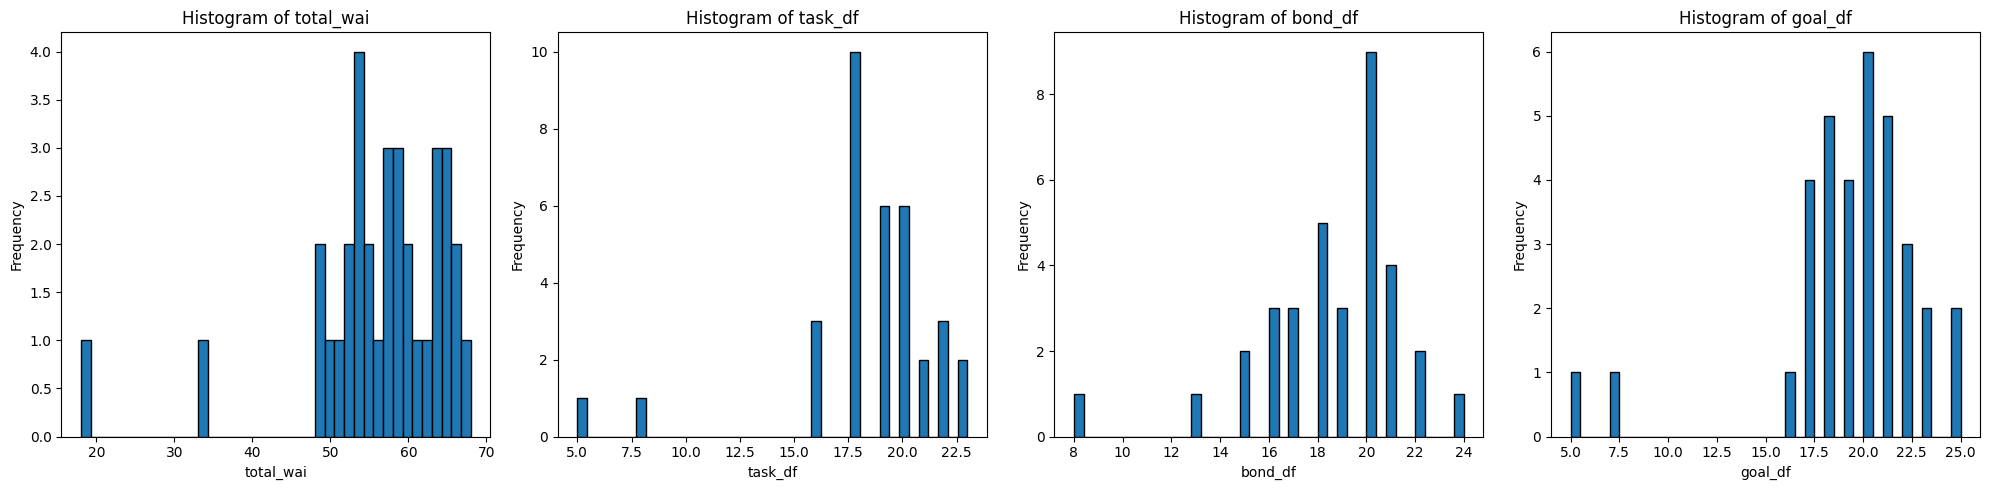

In [ ]:
# plot histogram of division of WAI scores
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/12-8_o.csv')

df['4'] = 7 - df['4']
df['10'] = 7 - df['10']

bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

# Create a figure and array of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plotting histograms for each column
columns = ['total_wai', 'task_df', 'bond_df', 'goal_df']
for i, col in enumerate(columns):
    ax = axes[i]
    ax.hist(df[col], bins=40, edgecolor='black')  # Adjust bins as needed
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Create an instance of KBinsDiscretizer with equal frequency binning strategy
n_bins = 2  # Choose the number of bins based on your data and problem
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Fit and transform the target variable to create categorical labels
categories = bin_encoder.fit_transform(df[['total_wai']])

# Map bin indices to category labels
category_labels = {0: "low", 1: "high"}

# Convert the bin indices to category labels
category_labels_array = np.vectorize(lambda x: category_labels[x])(categories.flatten())

# Reshape the array to match the shape of the DataFrame
category_labels_array = category_labels_array.reshape(-1, 1)

# Add the category labels to the DataFrame
df['category'] = category_labels_array

# Prepare features and labels
labels = df['category']

# Calculate the average value of 'total_wai' for each category
average_total_wai = df.groupby('category')['total_wai'].mean()

# Calculate the average value of 'total_wai' and the count of samples for each category
category_stats = df.groupby('category').agg({'total_wai': 'mean', 'category': 'count'})

# Print the average total_wai and the count of samples for each category
print('Category\tAverage Total WAI\tSample Count')
for category, stats in category_stats.iterrows():
    print(f'{category}\t\t{stats["total_wai"]:.2f}\t\t\t{int(stats["category"])}')

Category	Average Total WAI	Sample Count
high		61.79			19
low		48.87			15


## Patient

In [ ]:
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.60      0.75      0.67         4
#          low       0.75      0.60      0.67         5

#     accuracy                           0.67         9
#    macro avg       0.68      0.68      0.67         9
# weighted avg       0.68      0.67      0.67         9

# Confusion Matrix:
# [[3 1]
#  [2 3]]
# Cross-Validation Scores: [0.57142857 0.71428571 0.57142857 0.71428571 0.33333333]
# Mean CV Accuracy: 0.5809523809523809
# Standard Deviation of CV Accuracy: 0.13932132226978852

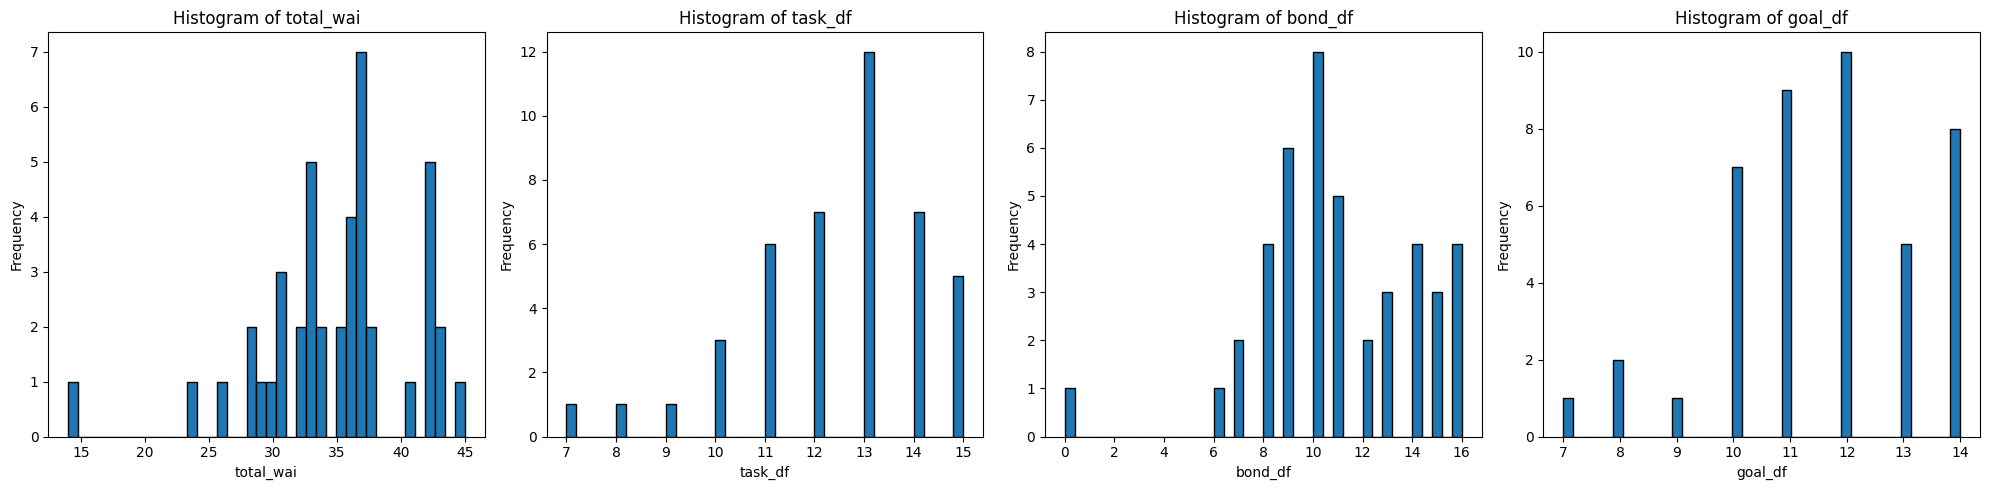

In [ ]:
# plot histogram of division of WAI scores
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/12-8_pat.csv', delimiter=';')

df['4'] = 7 - df['4']
df['10'] = 7 - df['10']

bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

# Create a figure and array of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plotting histograms for each column
columns = ['total_wai', 'task_df', 'bond_df', 'goal_df']
for i, col in enumerate(columns):
    ax = axes[i]
    ax.hist(df[col], bins=40, edgecolor='black')  # Adjust bins as needed
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Create an instance of KBinsDiscretizer with equal frequency binning strategy
n_bins = 2  # Choose the number of bins based on your data and problem
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Fit and transform the target variable to create categorical labels
categories = bin_encoder.fit_transform(df[['total_wai']])

# Map bin indices to category labels
category_labels = {0: "low", 1: "high"}

# Convert the bin indices to category labels
category_labels_array = np.vectorize(lambda x: category_labels[x])(categories.flatten())

# Reshape the array to match the shape of the DataFrame
category_labels_array = category_labels_array.reshape(-1, 1)

# Add the category labels to the DataFrame
df['category'] = category_labels_array

# Prepare features and labels
labels = df['category']

# Calculate the average value of 'total_wai' for each category
average_total_wai = df.groupby('category')['total_wai'].mean()

# Calculate the average value of 'total_wai' and the count of samples for each category
category_stats = df.groupby('category').agg({'total_wai': 'mean', 'category': 'count'})

# Print the average total_wai and the count of samples for each category
print('Category\tAverage Total WAI\tSample Count')
for category, stats in category_stats.iterrows():
    print(f'{category}\t\t{stats["total_wai"]:.2f}\t\t\t{int(stats["category"])}')


Category	Average Total WAI	Sample Count
high		39.14			22
low		30.43			21


## Therapist

In [ ]:
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.62      1.00      0.77         5
#          low       0.00      0.00      0.00         3

#     accuracy                           0.62         8
#    macro avg       0.31      0.50      0.38         8
# weighted avg       0.39      0.62      0.48         8

# Confusion Matrix:
# [[5 0]
#  [3 0]]
# Cross-Validation Scores: [0.66666667 0.66666667 0.5        0.5        0.8       ]
# Mean CV Accuracy: 0.6266666666666666
# Standard Deviation of CV Accuracy: 0.11430952132988165

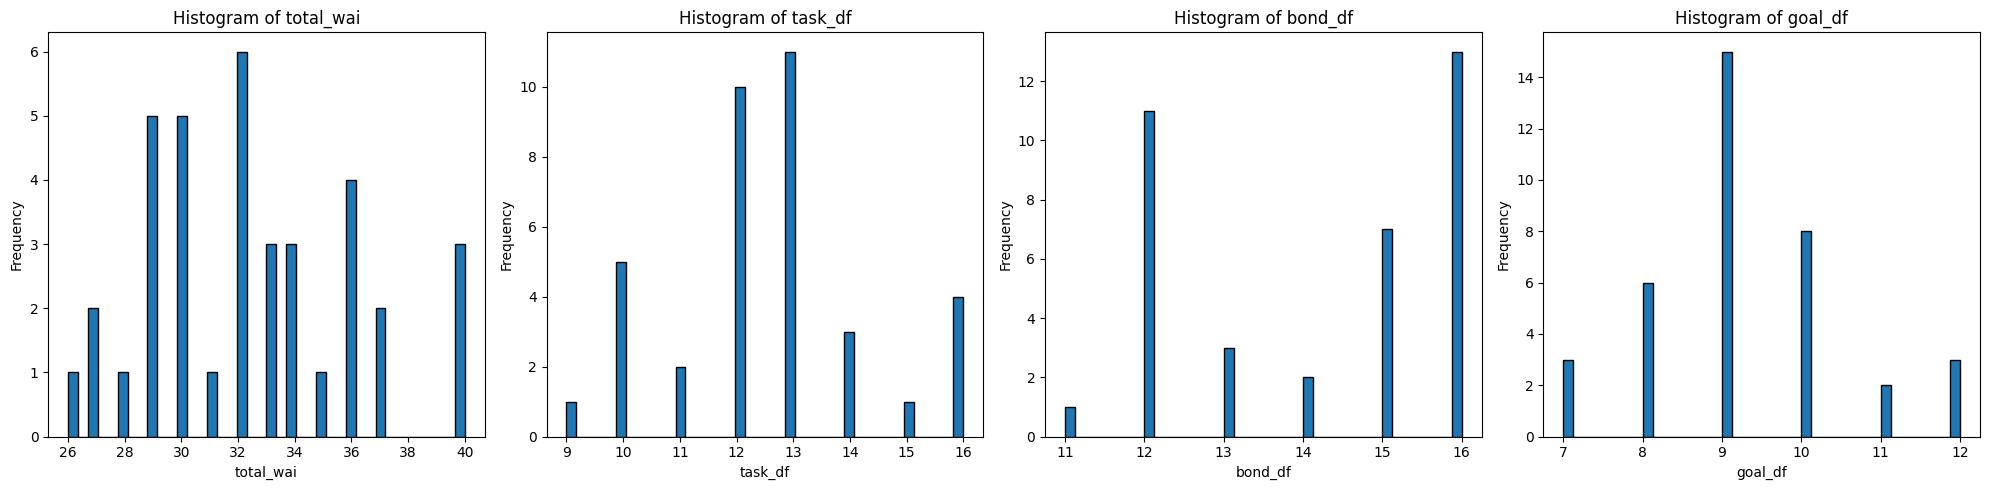

In [ ]:
# plot histogram of division of WAI scores
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/12-8_t.csv', delimiter=',')

# Assuming you have a DataFrame called 'df' with the desired columns
bond_columns = ['t2', 't5', 't7','t9']
goal_columns = ['t3', 't4', 't8']
task_columns = ['t1', 't2', 't6', 't10']
all_cols = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_cols].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

# Create a figure and array of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plotting histograms for each column
columns = ['total_wai', 'task_df', 'bond_df', 'goal_df']
for i, col in enumerate(columns):
    ax = axes[i]
    ax.hist(df[col], bins=40, edgecolor='black')  # Adjust bins as needed
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Create an instance of KBinsDiscretizer with equal frequency binning strategy
n_bins = 2  # Choose the number of bins based on your data and problem
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Fit and transform the target variable to create categorical labels
categories = bin_encoder.fit_transform(df[['total_wai']])

# Map bin indices to category labels
category_labels = {0: "low", 1: "high"}

# Convert the bin indices to category labels
category_labels_array = np.vectorize(lambda x: category_labels[x])(categories.flatten())

# Reshape the array to match the shape of the DataFrame
category_labels_array = category_labels_array.reshape(-1, 1)

# Add the category labels to the DataFrame
df['category'] = category_labels_array

# Prepare features and labels
labels = df['category']

# Calculate the average value of 'total_wai' for each category
average_total_wai = df.groupby('category')['total_wai'].mean()

# Calculate the average value of 'total_wai' and the count of samples for each category
category_stats = df.groupby('category').agg({'total_wai': 'mean', 'category': 'count'})

# Print the average total_wai and the count of samples for each category
print('Category\tAverage Total WAI\tSample Count')
for category, stats in category_stats.iterrows():
    print(f'{category}\t\t{stats["total_wai"]:.2f}\t\t\t{int(stats["category"])}')

Category	Average Total WAI	Sample Count
high		34.82			22
low		28.93			15


# run SVM

## trentofeatures in SVM for patient

In [ ]:
import pandas as pd
df = pd.read_csv('trento_pat.csv')

In [ ]:
df['4'] = 7 - df['4']
df['10'] = 7 - df['10']

bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

cols = df.columns

columns_to_exclude = ['ppnr', 'session','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','bond_df','goal_df'
,'task_df','total_wai']

# Remove specified columns from the DataFrame
cols_cleaned = [col for col in cols if col not in columns_to_exclude]


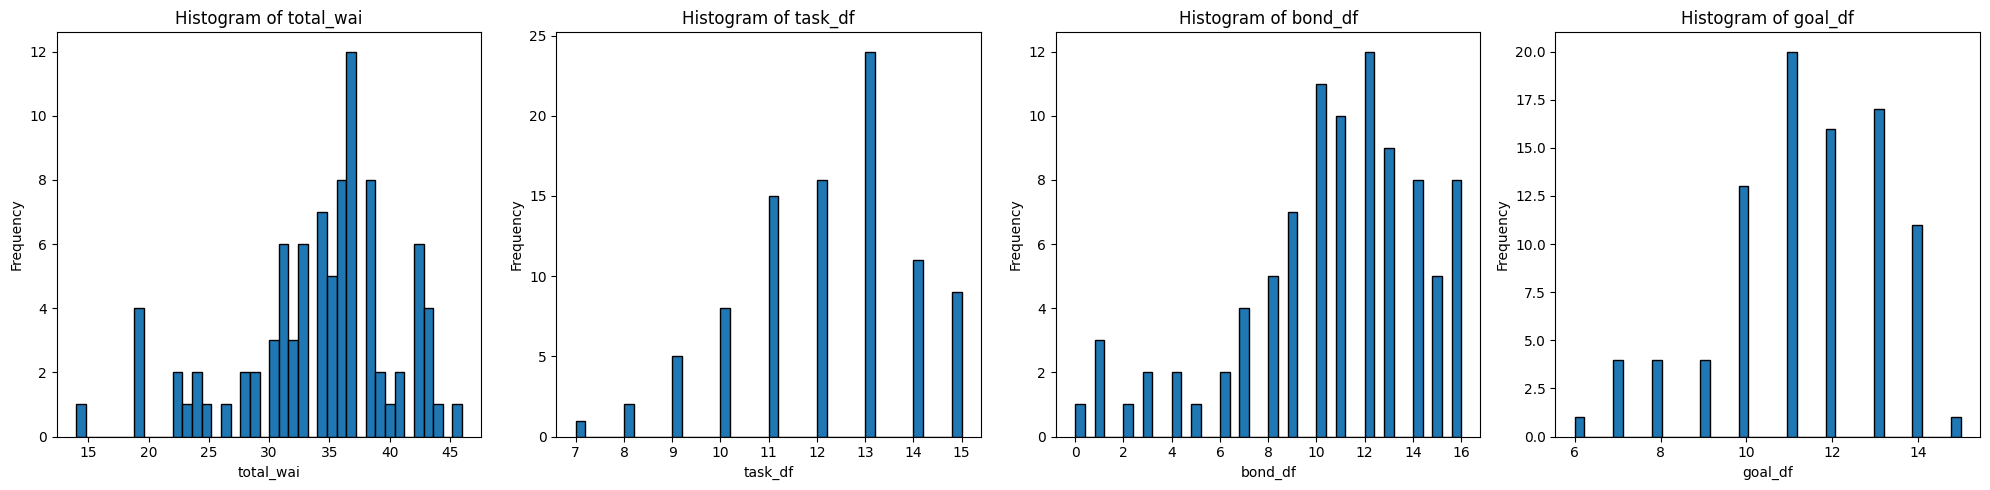

In [ ]:
# Create a figure and array of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plotting histograms for each column
columns = ['total_wai', 'task_df', 'bond_df', 'goal_df']
for i, col in enumerate(columns):
    ax = axes[i]
    ax.hist(df[col], bins=40, edgecolor='black')  # Adjust bins as needed
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
features = df[cols_cleaned]

In [ ]:
# Calculate the column-wise averages
column_averages = df.mean()

# Fill each empty space with the respective column's average value
df.fillna(column_averages, inplace=True)
df.fillna(0, inplace=True)

<ipython-input-45-f86f8ac1905a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_averages = df.mean()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Load your data into the 'df' DataFrame and preprocess features as needed

# Create an instance of KBinsDiscretizer with equal frequency binning strategy
n_bins = 2  # Choose the number of bins based on your data and problem
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Fit and transform the target variable to create categorical labels
categories = bin_encoder.fit_transform(df[['total_wai']])

# Map bin indices to category labels
category_labels = {0: "low", 1: "high"}

# Convert the bin indices to category labels
category_labels_array = np.vectorize(lambda x: category_labels[x])(categories.flatten())

# Reshape the array to match the shape of the DataFrame
category_labels_array = category_labels_array.reshape(-1, 1)

# Add the category labels to the DataFrame
df['category'] = category_labels_array

# Prepare features and labels
labels = df['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)

# Handle missing values in features using an imputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize the features to have mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

# Define a parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create and train the SVM classifier with Grid Search
svm_classifier = SVC(random_state=50)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_normalized, y_train)

# Get the best SVM model from the Grid Search
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_classifier.predict(X_test_normalized)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Perform cross-validation to assess model performance using the best estimator
cv_scores = cross_val_score(best_svm_classifier, X_train_normalized, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))

# Get coefficients and feature names for linear SVM
if best_svm_classifier.kernel == 'linear':
    coefficients = best_svm_classifier.coef_[0]
    feature_names = features.columns

    # Print coefficients and their corresponding features
    print("Feature Coefficients:")
    for coef, feature_name in zip(coefficients, feature_names):
        if coef > 0:
          print(f"{feature_name}: {coef}")
else:
    print("Coefficients are only available for linear SVM.")


# Get the best parameters from the Grid Search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Accuracy: 0.5789473684210527
Classification Report:
              precision    recall  f1-score   support

        high       0.67      0.67      0.67        12
         low       0.43      0.43      0.43         7

    accuracy                           0.58        19
   macro avg       0.55      0.55      0.55        19
weighted avg       0.58      0.58      0.58        19

Confusion Matrix:
[[8 4]
 [4 3]]
Cross-Validation Scores: [0.6        0.66666667 0.71428571 0.5        0.64285714]
Mean CV Accuracy: 0.6247619047619047
Standard Deviation of CV Accuracy: 0.0724936466056574
Coefficients are only available for linear SVM.
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
